In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, confusion_matrix, classification_report

In [4]:
df = pd.read_csv("data/clean_data.csv")
results = pd.read_csv("results/test_results.csv") 

In [5]:
class_distribution = {idx: (freq/(len(df))) for idx, freq in df.labels.value_counts().items()}

In [7]:
def get_idx2lbl_lbl2idx(df: pd.DataFrame, column: str = "labels") -> tuple[dict]:
    if column not in df.columns:
        raise ValueError(
            f"The dataframe does not contain the column '{column}'")
    idx2lbl = {i: df[column].unique()[i]
               for i in range(0, len(df[column].unique()))}
    lbl2idx = {df[column].unique()[i]: i for i in range(
        0, len(df[column].unique()))}
    return idx2lbl, lbl2idx

idx2lbl, lbl2idx = get_idx2lbl_lbl2idx(df)

## Class distribution

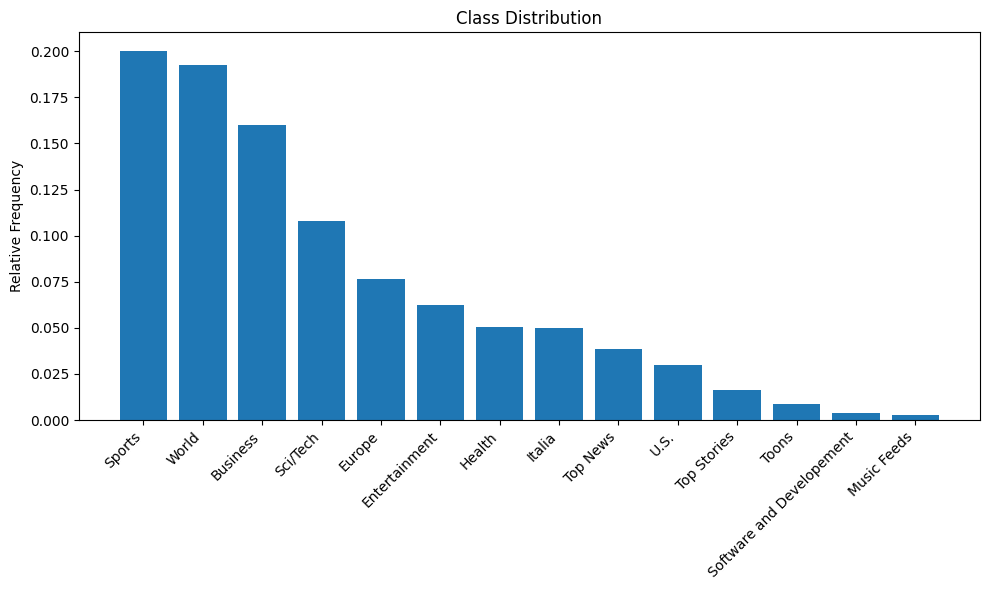

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.ylabel('Relative Frequency')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

## Results on test set

In [24]:
y_true = results["labels"]
y_pred = results["predictions"]

In [39]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3948
           1       0.86      0.90      0.88      2657
           2       0.87      0.80      0.83        94
           3       0.85      0.69      0.76      1536
           4       0.96      0.99      0.97      4934
           5       0.79      0.73      0.76       735
           6       0.86      0.90      0.88      4746
           7       0.86      0.91      0.88      1243
           8       0.92      0.89      0.91       951
           9       0.85      0.86      0.85      1882
          10       1.00      1.00      1.00      1235
          11       0.39      0.16      0.23       407
          12       1.00      1.00      1.00       210
          13       1.00      1.00      1.00        61

    accuracy                           0.89     24639
   macro avg       0.87      0.84      0.85     24639
weighted avg       0.89      0.89      0.89     24639



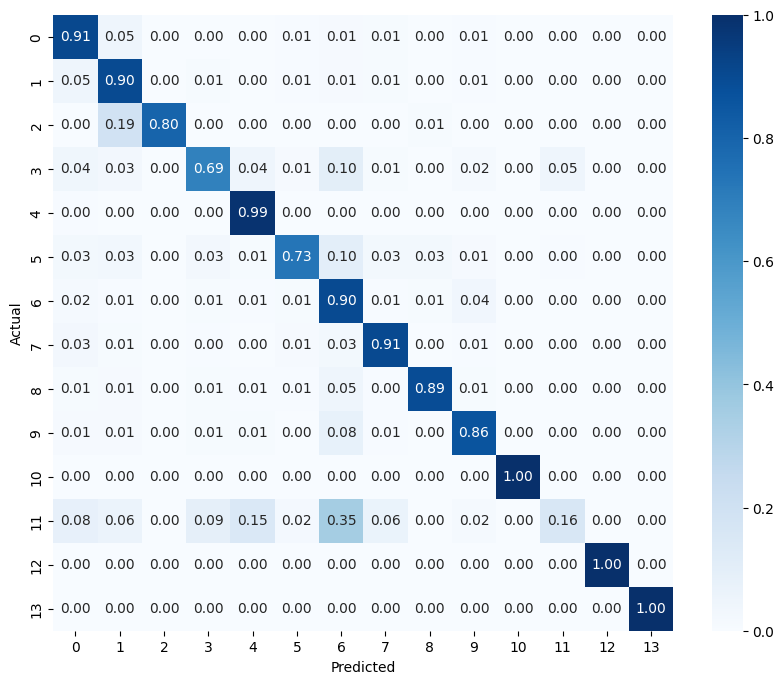

In [40]:
classes = np.unique(y_true)

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Plotting Confusion Matrix with Relative Frequencies
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.title('Confusion Matrix (Normalized)')
plt.show()


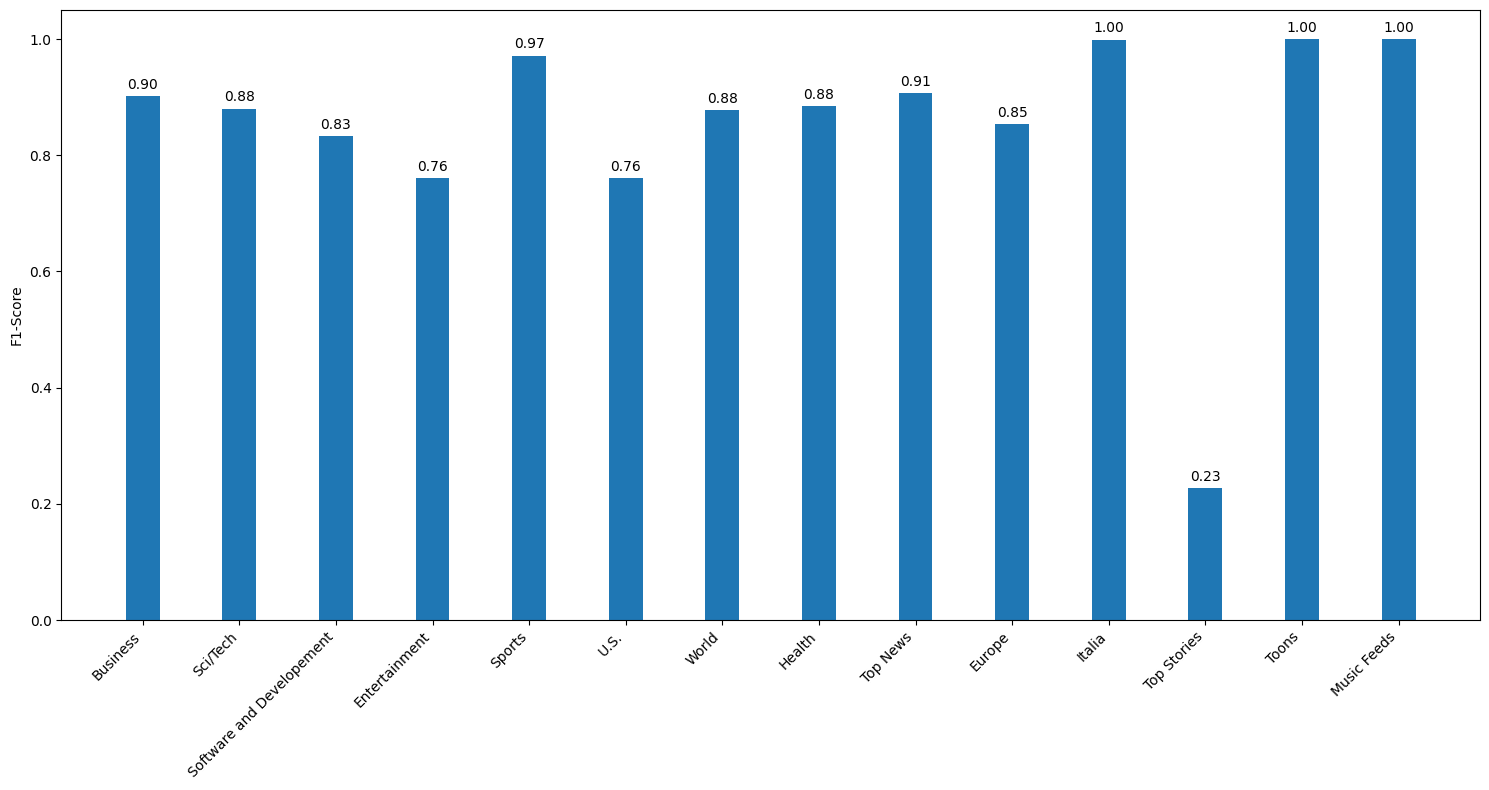

In [45]:
report = classification_report(y_true, y_pred, output_dict=True)

# Extract class labels and F1-scores
labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
f1_scores = [report[label]['f1-score'] for label in labels]

# Convert numerical labels to textual labels using idx2lbl
textual_labels = [idx2lbl[int(label)] for label in labels]

x = np.arange(len(textual_labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(x, f1_scores, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(textual_labels, rotation=45, ha="right")

# Attach a text label above each bar in bars, displaying its height.
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars)

plt.tight_layout()
plt.show()

In [49]:
idx2lbl

{0: 'Business',
 1: 'Sci/Tech',
 2: 'Software and Developement',
 3: 'Entertainment',
 4: 'Sports',
 5: 'U.S.',
 6: 'World',
 7: 'Health',
 8: 'Top News',
 9: 'Europe',
 10: 'Italia',
 11: 'Top Stories',
 12: 'Toons',
 13: 'Music Feeds'}